# Hypothesis 
## Most states that have a participation rate of less than 40% will have above-average SAT scores

### Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read in data

In [5]:
sat2017 = pd.read_csv(r"Data\sat_2017.csv")
sat2018 = pd.read_csv(r"Data\sat_2018.csv")
sat2019 = pd.read_csv(r"Data\sat_2019.csv")

### Data Preparation

In [7]:
sat2017.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace=True)
sat2017['sat_year'] = 2017

sat2018.rename(columns={'Evidence-Based Reading and Writing':'EBRW'}, inplace=True)
sat2018['sat_year'] = 2018

sat2019.rename(columns={'Participation Rate':'Participation'}, inplace=True)
sat2019['sat_year'] = 2019

sat_all = pd.concat([sat2017, sat2018, sat2019])
sat_all['Participation'] = sat_all['Participation'].astype(str).str.replace('—', '0').str.replace('%', '')
sat_all['Participation'] = pd.to_numeric(sat_all['Participation']) / 100
sat_all.rename(columns={'Total':'Sat_Score'}, inplace=True)


In [8]:
# Check for null and data types
print(sat_all.dtypes)
print(sat_all.isnull().sum())

State             object
Participation    float64
EBRW               int64
Math               int64
Sat_Score          int64
sat_year           int64
dtype: object
State            0
Participation    0
EBRW             0
Math             0
Sat_Score        0
sat_year         0
dtype: int64


In [9]:
# Only states with data for all three years are included.
state_counts = sat_all['State'].value_counts()
taken_threeyear = state_counts[state_counts == 3].index
sat_all = sat_all[sat_all['State'].isin(taken_threeyear)]


In [10]:
# Grouping to show the mean value of each dimention
sat_all_grouped = sat_all.groupby(['State']).agg({
    'Sat_Score': 'mean',
    'Participation' : 'mean',
}).reset_index()


In [11]:
# Mean of SAT Score
sat_mean = sat_all['Sat_Score'].mean()

---

## Data Visualization

**The first Chart** : average SAT score from group by participation rate with bar chart

In [15]:
# Preparation Table for create first chart
sat_participation_range = sat_all_grouped
sat_participation_range['participation_range'] = pd.cut(
    sat_all_grouped['Participation'],
    bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
    labels=['0%-20%', '21%-40%', '41%-60%','61%-80%','81%-100%']
)

# Group by participation_range and calculate mean Sat_Score 
sat_participation_range = sat_participation_range.groupby('participation_range', observed=False).agg(
    Sat_Score=('Sat_Score', 'mean')
).reset_index()

sat_participation_range['Sat_Score'] = sat_participation_range['Sat_Score'].fillna(0)

sat_participation_range.head()

,participation_range,Sat_Score
0,0%-20%,1209.883333
1,21%-40%,1135.166667
2,41%-60%,1070.571429
3,61%-80%,1073.976190
4,81%-100%,1013.583333


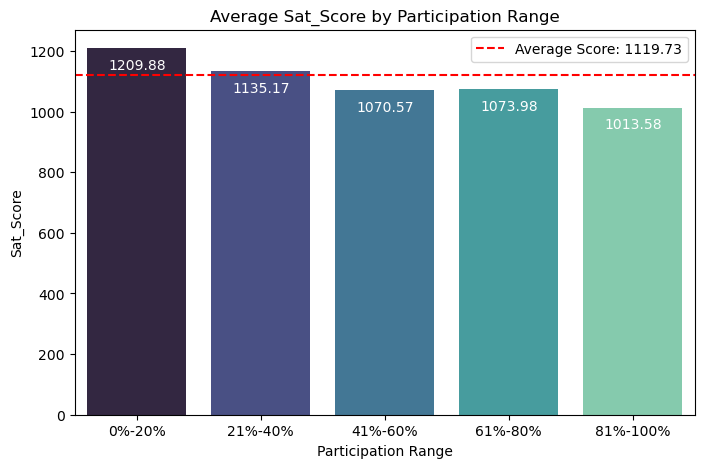

In [16]:
# Create a bar chart
plt.figure(figsize=(8, 5))
bars = sns.barplot(data=sat_participation_range, x='participation_range', y='Sat_Score', hue='participation_range', palette='mako', errorbar=None)

plt.title('Average Sat_Score by Participation Range')
plt.xlabel('Participation Range')
plt.ylabel('Average Sat_Score')

# Add a horizental line to show the average SAT score
plt.axhline(sat_mean, color='red', linestyle='--', label=f'Average Score: {sat_mean:.2f}')
plt.legend()

# Add data labels to each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, 
             height - 80,  
             f'{height:.2f}', 
             va='bottom', ha='center', color='white')

plt.xticks(rotation=0) 
plt.ylabel('Sat_Score') 

plt.savefig('Figure/MeanScore_byParRange.png', dpi=300)  
plt.show()

---

**The Second Chart** : average SAT score from States the less 40% participation rate with horizantal bar chart

In [19]:
# Preparation Table for create second chart
sat_less_participate_grouped = sat_all_grouped[sat_all_grouped['Participation'] < 0.4].sort_values(by = 'Sat_Score')
sat_less_participate_grouped.head()

,State,Sat_Score,Participation,participation_range
36,Oklahoma,1024.000000,0.123333,0%-20%
31,New Mexico,1101.333333,0.150000,0%-20%
35,Ohio,1115.000000,0.163333,0%-20%
2,Arizona,1133.000000,0.300000,21%-40%
28,Nevada,1137.333333,0.230000,21%-40%


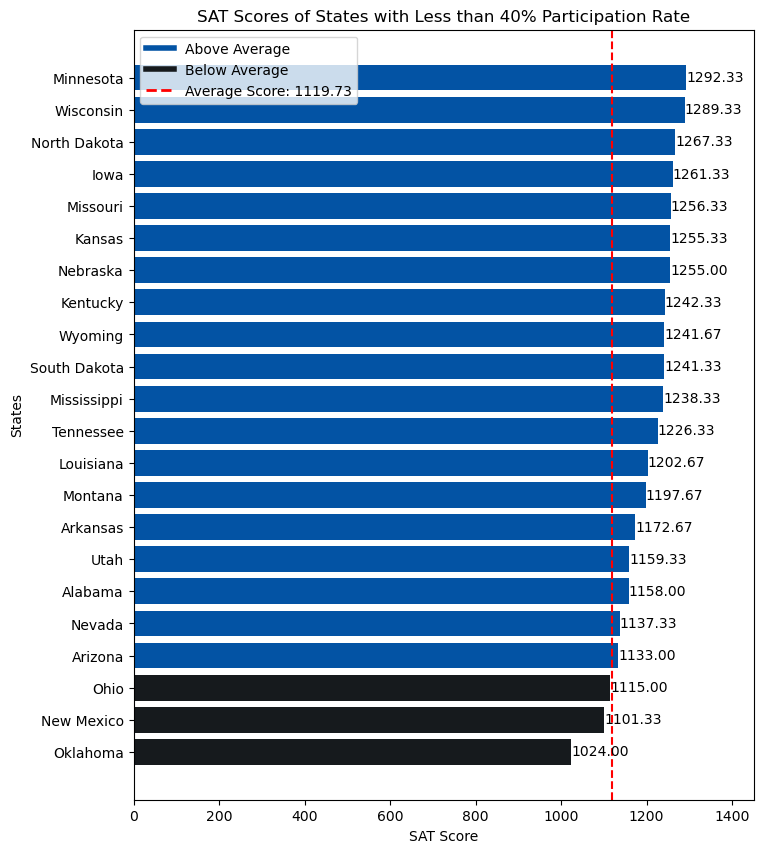

In [39]:
# Set the figure size
plt.figure(figsize=(8, 10))

# Set color by conditions
color = ['#161a1d' if score < sat_mean else '#0353a4' for score in sat_less_participate_grouped['Sat_Score']]

bars = plt.barh(sat_less_participate_grouped['State'], 
                sat_less_participate_grouped['Sat_Score'], 
                color= color)

# Add a vertical line to show the average SAT score
plt.axvline(sat_mean, color='red', linestyle='--')

plt.xlabel('SAT Score')  
plt.ylabel('States')  

# Add data labels for each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.2f}', 
             va='center', ha='left')

# Create custom legend with lines
legend_elements = [
    plt.Line2D([0], [0], color='#0353a4', lw=4, label='Above Average'),
    plt.Line2D([0], [0], color='#161a1d', lw=4, label='Below Average'),
    plt.Line2D([0], [0], color='red', lw=2,linestyle='--', label=f'Average Score: {sat_mean:.2f}')
]
plt.legend(handles=legend_elements, loc='upper left')

plt.xlim(0,1450)
plt.title('SAT Scores of States with Less than 40% Participation Rate')

plt.savefig('Figure/MeanScore_ofStates_ByLess40Par.png', dpi=300, bbox_inches = 'tight')  
plt.show()
